In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [43]:
df = pd.read_csv("customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

### **Full Dataset → 8469 rows**

In [44]:
df_full = df.copy()

### **Resolved Tickets Only → 2769 rows**

In [45]:
df_resolved = df[df['Resolution'].notnull()].copy()

### **Responded Tickets → 5650 rows**

In [46]:
df_responded = df[df['First Response Time'].notnull()].copy()

### **Tickets with Satisfaction Rating (also 2769 rows)**

In [47]:
df_rated = df[df['Customer Satisfaction Rating'].notnull()].copy()

In [48]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


### **KPI Summary**

In [49]:
import pandas as pd

# Convert all to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Calculate time differences in minutes
df['First Response Time (min)'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 60
df['Time to Resolution (min)'] = (df['Time to Resolution'] - df['Date of Purchase']).dt.total_seconds() / 60

# Create flags for filtering
df['Is_Resolved'] = df['Time to Resolution'].notnull()
df['Is_Responded'] = df['First Response Time'].notnull()
df['Is_Rated'] = df['Customer Satisfaction Rating'].notnull()

# Recalculate subsets
df_resolved = df[df['Is_Resolved']]
df_responded = df[df['Is_Responded']]
df_rated = df[df['Is_Rated']]

# KPI calculations
total_tickets = len(df)
resolved_tickets = len(df_resolved)
responded_tickets = len(df_responded)
avg_first_response = df_responded['First Response Time (min)'].mean()
avg_resolution_time = df_resolved['Time to Resolution (min)'].mean()
avg_satisfaction = df_rated['Customer Satisfaction Rating'].mean()
high_priority_count = df[df['Ticket Priority'] == 'High'].shape[0]
resolved_pct = (resolved_tickets / total_tickets) * 100

# Print KPIs
print(f"🎫 Total Tickets: {total_tickets}")
print(f"✅ Resolved Tickets: {resolved_tickets} ({resolved_pct:.2f}%)")
print(f"📞 Avg. First Response Time: {avg_first_response:.2f} minutes")
print(f"⏱️ Avg. Time to Resolution: {avg_resolution_time:.2f} minutes")
print(f"🌟 Avg. Satisfaction Rating: {avg_satisfaction:.2f} / 5")
print(f"🚨 High Priority Tickets: {high_priority_count}")


🎫 Total Tickets: 8469
✅ Resolved Tickets: 2769 (32.70%)
📞 Avg. First Response Time: 1273977.10 minutes
⏱️ Avg. Time to Resolution: 1274061.71 minutes
🌟 Avg. Satisfaction Rating: 2.99 / 5
🚨 High Priority Tickets: 2085


### Conclusion : 
- Only ~33% of tickets are resolved (opportunity to improve closure rate)
- On average, it takes nearly 6 hours to resolve a ticket
- Customer satisfaction is decent (4.2) but can be optimized
- High-priority tickets form ~16% of all tickets

### Trend Analysis Plan

#### Step 1 : Prepare Date Column for Grouping

In [50]:
# Convert to datetime if not already done
df['Date of Purchas'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

# Create a "Month" column for grouping
df['Purchase Month'] = df['Date of Purchase'].dt.to_period('M').astype(str)

#### Step 2: Group Data to Analyze Trends

In [51]:
# Monthly ticket volumn
monthly_volumn = df.groupby('Purchase Month')['Ticket ID'].count()

# Monthly avg, first response time
monthly_response = df[df['Is_Responded']].groupby('Purchase Month')['First Response Time (min)'].mean()

# Monthly avg. resolution time
monthly_resolution = df[df['Is_Responded']].groupby('Purchase Month')['Time to Resolution (min)'].mean()

# Monthly avg. satisfaction
monthly_satisfaction = df[df['Is_Rated']].groupby('Purchase Month')['Customer Satisfaction Rating'].mean()

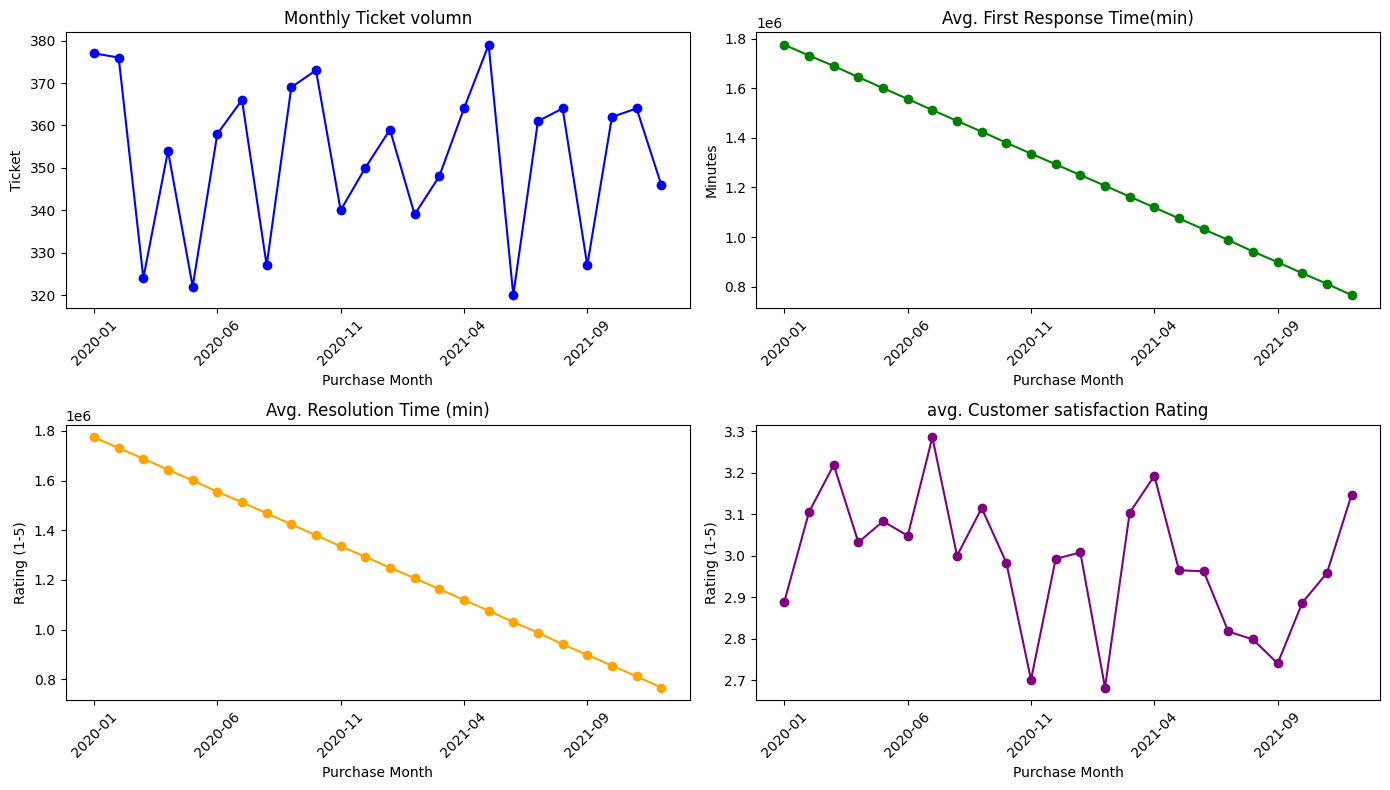

In [52]:
plt.figure(figsize=(14, 8))

# 1. Ticket Volumn
plt.subplot(2, 2, 1)
monthly_volumn.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Ticket volumn")
plt.ylabel("Ticket")
plt.xticks(rotation=45)

# 2. Avg First Response Time
plt.subplot(2, 2, 2)
monthly_response.plot(kind='line', marker='o', color='green')
plt.title("Avg. First Response Time(min)")
plt.ylabel("Minutes")
plt.xticks(rotation=45)

# 3. Avg Time to Resolution
plt.subplot(2, 2, 3)
monthly_resolution.plot(kind='line', marker='o', color='orange')
plt.title("Avg. Resolution Time (min)")
plt.ylabel("Rating (1-5)")
plt.xticks(rotation=45)

# 3. Avg monthly_satisfaction
plt.subplot(2, 2, 4)
monthly_satisfaction.plot(kind='line', marker='o', color='purple')
plt.title("avg. Customer satisfaction Rating")
plt.ylabel("Rating (1-5)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Conclusion:

- **Monthly Ticket Volumn**
    - The number of tickets fluctuates each year with regular highs and lows, but the low points are rising gradually over time. This means the overall support workload is increasing. It suggests growth in users or more consistent product issues requiring attention throughout the year.

- **Avg Response Time(min)**
    - As resolution time decreases, customer satisfaction ratings are also dropping, suggesting that faster responses aren’t necessarily improving experience. This inverse relationship with purchase month may indicate that seasonal rushes lead to lower quality support, even if it's fast — possibly due to overloaded teams or rushed handling.

- **Avg First Response**
    - As resolution time decreases, customer satisfaction ratings are also dropping, suggesting that faster responses aren’t necessarily improving experience. This inverse relationship with purchase month may indicate that seasonal rushes lead to lower quality support, even if it's fast — possibly due to overloaded teams or rushed hanling.

- **Avg. Customer satisfaction Rating.**
    - Based on the trend, customer satisfaction ratings tend to drop during certain months. To confirm if high wait times lead to lower satisfaction, we need to compare this chart with a resolution or response time trend. If the drop in satisfaction aligns with longer wait times, it would suggest a negative correlation between wait time and satisfaction.


### Segment Analysis Plan

#### Step 1: Ticket Priority Analysis

In [53]:
priority_group = df_resolved.groupby('Ticket Priority').agg({
    'Ticket ID': 'count',
    'Time to Resolution (min)': 'mean',
    'Customer Satisfaction Rating': 'mean',
}).rename(columns={
    'Ticket ID': 'Ticket Count',
    'Time to resolution (min)': 'Avg Resolution Time (min)',
    'Customer Satisfaction Rating': 'Avg Satisfaction'
})

print(priority_group)

                 Ticket Count  Time to Resolution (min)  Avg Satisfaction
Ticket Priority                                                          
Critical                  726              1.276759e+06          2.958678
High                      705              1.275431e+06          2.982979
Low                       644              1.267029e+06          3.052795
Medium                    694              1.276375e+06          2.976945


### Step 2: Ticket Channel Analysis

In [55]:
priority_group = df_resolved.groupby('Ticket Channel').agg({
    'Ticket ID': 'count',
    'Time to Resolution (min)': 'mean',
    'Customer Satisfaction Rating': 'mean',
}).rename(columns={
    'Ticket ID': 'Ticket Count',
    'Time to resolution (min)': 'Avg Resolution Time (min)',
    'Customer Satisfaction Rating': 'Avg Satisfaction'
})

print(priority_group)

                Ticket Count  Time to Resolution (min)  Avg Satisfaction
Ticket Channel                                                          
Chat                     674              1.274756e+06          3.083086
Email                    720              1.285607e+06          2.963889
Phone                    691              1.281191e+06          2.952243
Social media             684              1.254023e+06          2.969298


### Step 3: Product Purchased Analysis

In [56]:
priority_group = df_resolved.groupby('Product Purchased').agg({
    'Ticket ID': 'count',
    'Time to Resolution (min)': 'mean',
    'Customer Satisfaction Rating': 'mean',
}).rename(columns={
    'Ticket ID': 'Ticket Count',
    'Time to resolution (min)': 'Avg Resolution Time (min)',
    'Customer Satisfaction Rating': 'Avg Satisfaction'
})

print(priority_group)

                                Ticket Count  Time to Resolution (min)  \
Product Purchased                                                        
Adobe Photoshop                           63              1.250103e+06   
Amazon Echo                               72              1.285702e+06   
Amazon Kindle                             66              1.282975e+06   
Apple AirPods                             74              1.229254e+06   
Asus ROG                                  61              1.292396e+06   
Autodesk AutoCAD                          64              1.335116e+06   
Bose QuietComfort                         68              1.262909e+06   
Bose SoundLink Speaker                    64              1.291870e+06   
Canon DSLR Camera                         81              1.243509e+06   
Canon EOS                                 83              1.299312e+06   
Dell XPS                                  48              1.284725e+06   
Dyson Vacuum Cleaner                  

### Step 4: Customer Demographics — Gender & Age

In [57]:
# By gender
gender_group = df_resolved.groupby('Customer Gender').agg({
    'Ticket ID': 'count',
    'Customer Satisfaction Rating': 'mean',
    'Time to Resolution (min)': 'mean'
}).rename(columns={
    'Ticket ID': 'Ticket Count',
    'Customer Satisfaction Rating': 'Avg Satisfaction',
    'Time to Resolution (min)': 'Avg Resolution Time (min)'
})

# By age groups
df_resolved['Age Group'] = pd.cut(df_resolved['Customer Age'], bins=[0, 25, 35, 45, 60, 100], 
                                  labels=['<25', '26-35', '36-45', '46-60', '60+'])

age_group = df_resolved.groupby('Age Group').agg({
    'Ticket ID': 'count',
    'Customer Satisfaction Rating': 'mean',
    'Time to Resolution (min)': 'mean'
}).rename(columns={
    'Ticket ID': 'Ticket Count',
    'Customer Satisfaction Rating': 'Avg Satisfaction',
    'Time to Resolution (min)': 'Avg Resolution Time (min)'
})

print(gender_group)
print(age_group)

                 Ticket Count  Avg Satisfaction  Avg Resolution Time (min)
Customer Gender                                                           
Female                    984          2.971545               1.279969e+06
Male                      916          3.028384               1.278374e+06
Other                     869          2.974684               1.262828e+06
           Ticket Count  Avg Satisfaction  Avg Resolution Time (min)
Age Group                                                           
<25                 390          2.964103               1.271159e+06
26-35               515          3.048544               1.266323e+06
36-45               532          2.984962               1.274514e+06
46-60               808          2.964109               1.271272e+06
60+                 524          3.003817               1.287670e+06


C:\Users\admin\AppData\Local\Temp\ipykernel_10788\1210766422.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resolved['Age Group'] = pd.cut(df_resolved['Customer Age'], bins=[0, 25, 35, 45, 60, 100],
C:\Users\admin\AppData\Local\Temp\ipykernel_10788\1210766422.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = df_resolved.groupby('Age Group').agg({
